In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic_dataset.csv",index_col="PassengerId",usecols=["PassengerId","Survived","Pclass","Sex","Age"])
df.head()

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.8+ KB


In [5]:
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [6]:
df.shape

(891, 4)

In [7]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177


In [8]:
#df.dropna(inplace=True)

In [9]:
#df.shape

In [10]:
#df["Age"].mode()

In [11]:
x=df["Age"].mean()
x
print(df["Age"].fillna(x,inplace=True))

None


<ipython-input-11-3c3e99773bd2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df["Age"].fillna(x,inplace=True))


In [12]:
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0


In [13]:
#df.dropna(inplace=True)

In [14]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


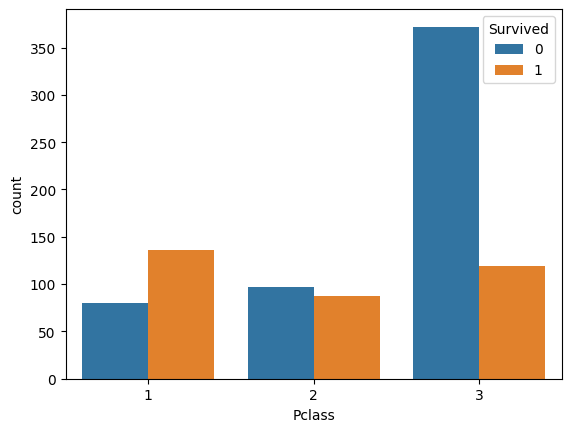

In [15]:
sns.countplot(x=df["Pclass"],data=df,hue="Survived")
plt.show()

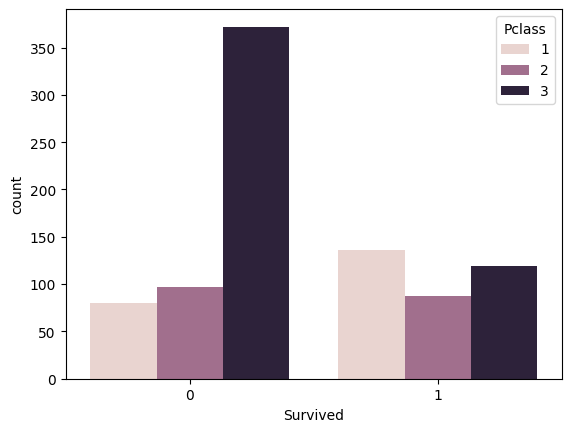

In [16]:
sns.countplot(x=df["Survived"],data=df,hue="Pclass")
plt.show()

In [17]:
p_class_sur=pd.pivot_table(df,index=["Pclass"],columns=["Survived"],aggfunc="size",values=["Sex"])
p_class_sur

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


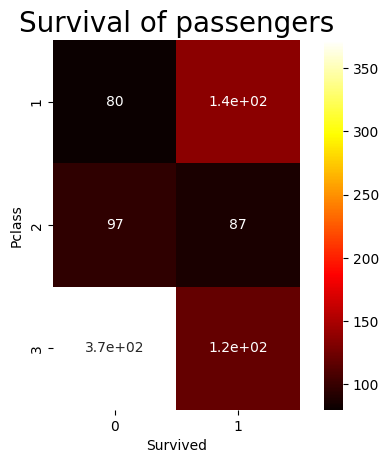

In [18]:
sns.heatmap(p_class_sur,annot=True,cmap="hot",square=True)
plt.title("Survival of passengers",fontsize=20)
plt.show()

In [19]:
df.shape

(891, 4)

In [20]:
survived=p_class_sur.sum(axis=0)/891
survived

,0
Survived,
0,0.616162
1,0.383838


In [21]:
p_class=p_class_sur.sum(axis=1)/891
p_class

,0
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [22]:
original_data=p_class.to_frame()@ (survived.to_frame().T)
original_data

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


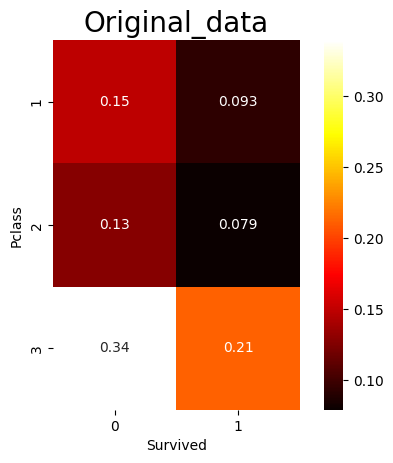

In [23]:
sns.heatmap(original_data,annot=True,cmap="hot",square=True)
plt.title("Original_data",fontsize=20)
plt.show()

In [24]:
chi_tab=((survived-original_data)**2)/original_data
chi_tab

Survived,0,1
Pclass,,
1,1.458716,0.908708
2,1.878616,1.170285
3,0.225349,0.140381


In [25]:
from scipy.stats.distributions import chi2
chi_val=chi_tab.sum().sum()
chi_val

np.float64(5.782055255467988)